# Report on Solving the Traveling Salesman Problem with Simulated Annealing

## 1. Introduction
The Traveling Salesman Problem (TSP) is a classic optimization problem in computer science that seeks to find the shortest possible route that a salesman can take to visit a given set of cities and return to the starting point. The problem becomes increasingly complex as the number of cities increases, making it computationally challenging to find the optimal solution. In this report, we present a Python implementation of a Simulated Annealing (SA) algorithm to solve the TSP.

## 2. Algorithm Overview
The SA algorithm is a metaheuristic optimization technique inspired by the annealing process in metallurgy. It aims to simulate the physical process of slowly cooling a material to decrease defects and obtain the most favorable atomic arrangement. Similarly, the SA algorithm searches for an optimal solution by iteratively exploring the solution space, allowing for occasional uphill moves to escape local optima.

## 3. Code Explanation
The provided Python code implements the SA algorithm to solve the TSP. Let's break down the key components and their functionalities:

- **openFile(file)**: This function reads a file containing the TSP data and returns a list of points, where each point represents a city and its coordinates.

- **calculate_distances(points)**: This function calculates the distances between each pair of cities based on their coordinates. It returns a distance matrix, where distances[i][j] represents the distance between city i and city j.

- **calculate_cost(points, distances)**: This function calculates the cost of a given solution (i.e., a sequence of cities) based on the distances between them. The cost represents the total distance traveled in the TSP route.

- **move_neighboring_solution(points, distances, temperature)**: This function generates a neighboring solution by swapping two cities in the current solution. The swap is performed with a probability determined by the temperature parameter and the change in cost. If the new solution is better or satisfies the acceptance probability, the swap is accepted.

- **SA(file, target, initial_temperature, cooling_rate)**: This is the main SA algorithm implementation. It takes the file path, a target cost, the initial temperature, and the cooling rate as input parameters. It initializes the algorithm by opening the file, calculating distances, and shuffling the initial solution randomly. Then, it iteratively performs the SA algorithm, adjusting the temperature and exploring neighboring solutions until either the target cost is reached or the temperature drops to zero. It returns the final solution (sequence of cities), the number of iterations, a list of temperatures over time, and a list of costs over time.

## 4. Usage Example
In the provided code, the SA algorithm is applied to solve the TSP using the `pr1002.tsp` dataset. The target cost is set to 1,000,000, the initial temperature is set to 1000, and the cooling rate is set to 0.99. The results are stored in the variable `res`.



In [35]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def openFile(file):
    with open(file) as f:
        lines=f.read().split('\n')[:-1]
        points=[]
        flag=False
        for line in lines:
            if(line=='EOF'):break
            if(flag):
                points.append(list(map(float,line.split()[1:])))
            if(line=='NODE_COORD_SECTION'):
                flag=True
    return [(points[i],i) for i in range(len(points))]

In [4]:
def calculate_distances(points):
    distances=[[0 for _ in range(len(points))] for _ in range(len(points))]
    for i in range(len(points)-1):
        for j in range(i+1,len(points)):
            distance=(math.dist(points[i][0],points[j][0]))
            distances[i][j]=distance
            distances[j][i]=distance
    return distances

In [5]:
def calculate_cost(points,distances):
    cost=0
    for i in range(len(points)-1):
        cost+=distances[points[i][1]][points[i+1][1]]
    return cost

In [6]:
def move_neighboring_solution(points,distances,temperature):
    i, j = random.sample(range(1,len(points)-1),2)
    while abs(i-j)==1:
        i, j = random.sample(range(1,len(points)-1),2)
    dif = 0
    dif -=(distances[points[i-1][1]][points[i][1]]+distances[points[i][1]][points[i+1][1]])
    dif -= (distances[points[j-1][1]][points[j][1]]+distances[points[j][1]][points[j+1][1]])
    dif += (distances[points[i-1][1]][points[j][1]]+distances[points[j][1]][points[i+1][1]])
    dif += (distances[points[j-1][1]][points[i][1]]+distances[points[i][1]][points[j+1][1]])
    if(dif<0 or math.exp(-dif/(temperature*10)) > random.random()):
        points[i],points[j]=points[j],points[i]
        return dif 
    return 0

In [52]:
def SA(file,target,initial_temperature,cooling_rate):
    points=openFile(file)
    distances=calculate_distances(points)
    random.shuffle(points)
    cost=calculate_cost(points,distances)
    temperature=initial_temperature
    iterations=0
    temperatures=[]
    costs=[]
    while cost>target and temperature>0:
        for _ in range(1000):
            cost+=move_neighboring_solution(points,distances,temperature)
        costs.append(cost)
        temperatures.append(temperature)
        iterations+=1
        temperature *= cooling_rate
    return (points),iterations,temperatures,costs


In [38]:
res=SA('./pr1002.tsp',1000000,1000,0.99)

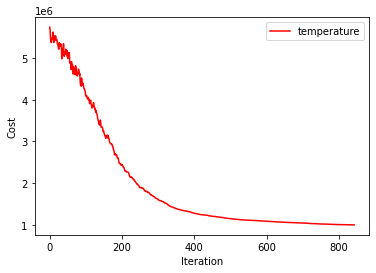

In [39]:
X = np.arange(0, res[1], 1)
y = res[3]
plt.plot(X, y, color='r', label='temperature')
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()


In [54]:
res2 = SA('./gr229.tsp',2300,400,0.99)

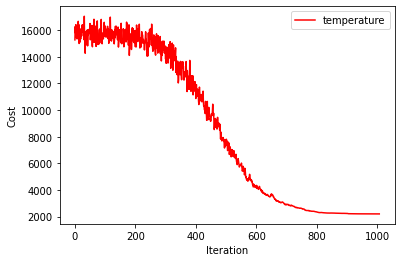

In [55]:
X = np.arange(0, res2[1], 1)
y = res2[3]
plt.plot(X, y, color='r', label='temperature')
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()
